# Estimate feature importance via "feature permutation"
http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/?fbclid=IwAR12lcrbnld2FnNuePy749gXiQJf8WegfBtnX4z8rxcN0ur51eCezwDRSKY

https://explained.ai/rf-importance/index.html

Permutation importance is generally considered as a relatively efficient technique that works well in practice [1], while a drawback is that the importance of correlated features may be overestimated: 
Strobl, C., Boulesteix, A. L., Kneib, T., Augustin, T., & Zeileis, A. (2008). Conditional variable importance for random forests. BMC bioinformatics, 9(1), 307.



### Example 1: feature importance classifiers

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import feature_importance_permutation

In [6]:
# create a toy dataset
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#build a classification task using 3 informative features
X, y = make_classification(n_samples=10000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [19]:
type(X_train)
X_train.shape
X_train[:6,:6]
X_train


array([[ 0.21106781,  0.94153676,  0.62881193, ..., -1.05194253,
        -0.05200198,  0.18088636],
       [ 0.91589812,  2.11957726, -2.61581974, ...,  1.48736613,
        -0.90744161, -1.73375274],
       [ 1.05892464,  1.27148841, -0.9294861 , ..., -1.7638768 ,
        -0.88893658, -0.85067803],
       ...,
       [ 1.00569259,  0.51822566,  0.95426933, ..., -0.11622977,
        -0.54457282,  1.09866276],
       [-0.10709122, -0.77323249,  1.00817479, ...,  1.39155897,
         0.60017511, -0.32279587],
       [-1.57595014,  0.30585477, -1.13626844, ...,  1.20147274,
         0.35166799, -0.62273047]])

In [35]:
forest_mdl = RandomForestClassifier(n_estimators=250, random_state=0)
forest_mdl.fit(X_train, y_train)

print("training accuracy: ", np.mean(forest_mdl.predict(X_train) == y_train) * 100)
print("test accuracy: ", np.mean(forest_mdl.predict(X_test) == y_test) * 100)
importance_vals = forest_mdl.feature_importances_
print(importance_vals)

training accuracy:  100.0
test accuracy:  95.06666666666666
[0.283357   0.30846795 0.24204291 0.02229767 0.02364941 0.02390578
 0.02501543 0.0234225  0.02370816 0.0241332 ]


(0.0, 0.4)

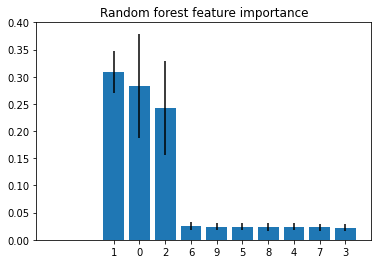

In [63]:
### Let's visualize the feature importance values from the random forest including a measure of 
#the "mean impurity decrease" variability (here: standard deviation):

std = np.std([tree.feature_importances_ for tree in forest_mdl.estimators_], axis=0)
[tree.feature_importances_ for tree in forest_mdl.estimators_][0].shape # (10,)
indices = np.argsort(importance_vals)[::-1]  #argsort sorts indices increasingly, we wanted decreasing

# Plot the feature importances of the forest_mdl
plt.figure()
plt.title("Random forest feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices], 
       yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-3, X.shape[1]])
plt.ylim([0, 0.4])

In [54]:
std

array([0.09605277, 0.03822192, 0.08644115, 0.0063216 , 0.00645192,
       0.00638371, 0.00712055, 0.00644667, 0.00666152, 0.00646481])

### Let's compute the feature importance via the permutation importance approach.

In [64]:
imp_vals, _ = feature_importance_permutation(
    predict_method=forest_mdl.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=1,
    seed=1)

imp_vals

array([ 0.26833333,  0.26733333,  0.261     , -0.002     , -0.00033333,
        0.00066667,  0.00233333,  0.00066667,  0.00066667, -0.00233333])

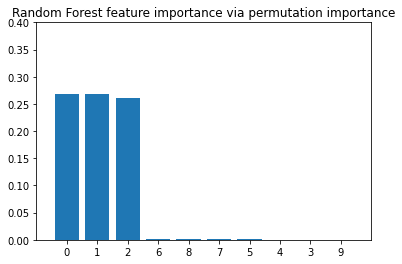

In [66]:
indices = np.argsort(imp_vals)[::-1]
plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.4])
plt.show()

Previously, it was mentioned that the permutation is repeated multiple times if num_rounds > 1. In this case, the second array returned by the feature_importance_permutation contains the importance values for these individual runs (the array has shape [num_features, num_rounds), which we can use to compute some sort of variability between these runs.



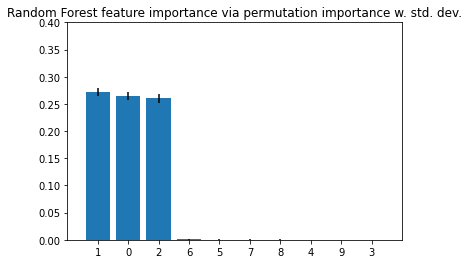

In [69]:
imp_vals, imp_all = feature_importance_permutation(
    predict_method=forest_mdl.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=10,
    seed=1)


std = np.std(imp_all, axis=1) #unlike above axis=1
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0,0.4])
plt.show()

### Example 2: feature importance regressors

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import feature_importance_permutation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.svm import SVR


X, y = make_regression(n_samples=1000,
                       n_features=5,
                       n_informative=2,
                       n_targets=1,
                       random_state=123,
                       shuffle=False)

In [81]:
print(X.shape)
X[:6,:100]

(1000, 5)


array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025],
       [ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196],
       [-0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203, -0.93583387,  1.17582904, -1.25388067],
       [-0.6377515 ,  0.9071052 , -1.4286807 , -0.14006872, -0.8617549 ]])

In [79]:
y[1:10]

array([  -8.05137143,  -57.51434696,   89.4139685 ,  139.75225425,
          1.43708679, -175.50966365,  -13.20283679, -158.17859798,
        132.30871463])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)    

svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

imp_vals, _ = feature_importance_permutation(
    predict_method=svm.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)

imp_vals

array([ 0.43309137,  0.22058866,  0.00148447,  0.01613953, -0.00529505])

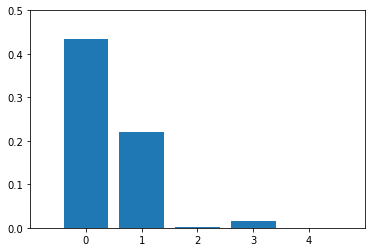

In [83]:
plt.figure()
plt.bar(range(X.shape[1]), imp_vals)
plt.xticks(range(X.shape[1]))
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.5])
plt.show()

### Example 3: Feature importance with one-hot-encoded features